<a href="https://colab.research.google.com/github/Kartik2559/Learning-/blob/main/A_B_Testing_%26_Power_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Scenario** :

Imagine a company named "Shopifyluxe" that sells luxury items online. They recently redesigned the checkout button on their website to see if it would increase sales conversions. The original design is the "control" group (A) and the new design is the "treatment" group (B).

Conversion rate = converted customer/ total customer

total customers = all the customers visiting website

coverted customer = those who made purchase


**Typical steps we have for A/B testing**

1) Hypothesis formulation

2) Diversion and exposure condition

3) Sample size calculation --> how many samples we need in our A/B test

4) A/B test

5) Analyze data

6) Recommendation

**1. Hypothesis formulation**

**Null Hypothesis:** The change in the button design has no effect on the conversion rate.

**Alternate Hypothesis:** The change in the button effect the conversion rate.

**2. Diversion Criterion**

For simplicity, we'll divert users randomly to either the control or treatment group using cookie-based diversion. We'll expose 50% of our visitors to the old button design (Group A) and 50% to the new design (Group B).

**3. Power analysis**

It helps us to calculate the number of samples required in each group for running effective experiment

a) alpha (type I error) =0.05/5%

b) power (1- type II error) = 80%

c) standard deviation

d) minimum detectatble effect


Minimum detectable effect  is the minimum change you expect in your metric to have considerable business impact



Option-1: Work on cart

Option-2: Work on voice feature

Option-3: payment flow


Both are going to hekp in placing order.


Cart improves we can 15% sales improvement

VOice search includes we are going to get 10% improvement

Payment -12%


feature > 10 % improvement

mde = 11%

In [4]:
# calculate power curves for varying sample and effect size

import numpy as np
import matplotlib.pyplot as plt

from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_effectsize


In [27]:
base_conversion_rate = 0.1 # current sales conversion rate for company
power = 0.8
alpha = 0.05
minimum_detectable_effect = 0.15 #MDE

# 10%. Increase of 5% in conversion = 0.1*0.15 =0.015 = 1.5%

# new conversion rate =0.1+0.015= 0.115 = 11.5%

In [28]:
# 2. Power Analysis

sample_size = NormalIndPower().solve_power(effect_size = minimum_detectable_effect, alpha = alpha, power = power, alternative = 'larger')


In [29]:
sample_size

549.5606428536755

Number of samples are:

1. Inversely proportional to effect size --> bigger the effect smaller the sample you need

2. Inversely proprtional to sifnificance level --> smaller the significance more sample you need

3. directly proportional to power --> higher the power the more samples you need


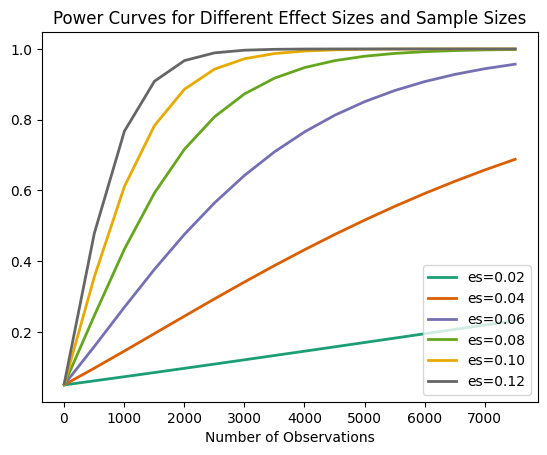

In [32]:
# Parameters for power analysis
effect_sizes = np.array([0.02, 0.04, 0.06,0.08, 0.1, 0.12])
sample_sizes = np.array(range(5, 8001, 500))  # Ranges from 5 to 10000 for a broader view

# Calculate power curves for the varying samples and effect sizes
analysis = NormalIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
plt.title('Power Curves for Different Effect Sizes and Sample Sizes')
plt.show()

In [33]:
import pandas as pd

In [34]:
data = pd.read_csv('/content/ab_test_data - ab_test_data.csv')

In [35]:
data.sample(5)

,group,converted
5432,B,0
2076,A,0
8539,B,0
133,A,0
5415,B,0


In [44]:
# Z test for proportions

count = data.groupby('group')['converted'].sum().values

nobs = data.groupby('group').size().values

print(count)
print(nobs)

[479 567]
[5000 5000]


In [45]:
from statsmodels.stats.proportion import proportions_ztest

z_stats, p_value_z_test = proportions_ztest(count, nobs)

print(f'Z Statastics : {z_stats}')
print(f'P Value : {p_value_z_test}')

Z Statastics : -2.8754663182630487
P Value : 0.004034311857575921


In [50]:
# from scipy.stats import chi2_contingency

# # 2. Create a contingency table
# contingency_table = pd.crosstab(ab_test_data['group'], ab_test_data['converted'])

# # 3. Conduct chi-square test
# chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

# print(f"Chi-Square Statistic: {chi2_stat}")
# print(f"P-value: {p_value}")

from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(data['group'], data['converted'])

chi2_stats, P_value, _, _ = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2_stats}")
print(f"P-value: {P_value}")

Chi-Square Statistic: 8.081458194442725
P-value: 0.004472044654175628


Conclusion:

1) We reject null hypothesis as p-value < alpha

2) We saw a point estimate increase of 19% with 95% confidence..CI??

3) My recommendation is to build the feature as sales value is greater than equal to MDE